In [ ]:
# Para usar o spacy em português
!python -m spacy download pt_core_news_sm

#Aparentemente esse pacote aumenta a precisão de algumas operações do spacy
!pip install –U spacy-lookups-data

In [ ]:
#Para  acessar dados do google drive
from google.colab import drive

#Pandas e numpy
import pandas as pd
import numpy as np

#Tratamento de texto
from tqdm import tqdm
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Divisão de dados
from sklearn.model_selection import train_test_split

#Modelos de machine learning
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import MultinomialNB

#Métricas de classificação
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/dados/B2W-Reviews01.csv"
data = pd.read_csv(path)

<ipython-input-22-16ed8c520770>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


In [ ]:
data

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,NaN,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,NaN,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,NaN,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


mini-tratamento dos dados:

In [ ]:
data['submission_date'] = pd.to_datetime(data['submission_date'])

#submission date = date
#transformar sexo em 1 e 0

In [ ]:
data

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,NaN,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,NaN,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,NaN,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   submission_date        132373 non-null  datetime64[ns]
 1   reviewer_id            132373 non-null  object        
 2   product_id             132373 non-null  object        
 3   product_name           132289 non-null  object        
 4   product_brand          40982 non-null   object        
 5   site_category_lv1      132367 non-null  object        
 6   site_category_lv2      128360 non-null  object        
 7   review_title           132071 non-null  object        
 8   overall_rating         132373 non-null  int64         
 9   recommend_to_a_friend  132355 non-null  object        
 10  review_text            129098 non-null  object        
 11  reviewer_birth_year    126389 non-null  float64       
 12  reviewer_gender        128237 non-null  obje

In [ ]:
data['review_text']

0         Estou contente com a compra entrega rápida o ú...
1         Por apenas R$1994.20,eu consegui comprar esse ...
2         SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3         MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4         A entrega foi no prazo, as americanas estão de...
                                ...                        
132368    Vale muito, estou usando no controle do Xbox e...
132369    Prático e barato, super indico o produto para ...
132370    Chegou antes do prazo previsto e corresponde a...
132371    Material fraco, poderia ser melhor. Ficou deve...
132372    Comprei esse produto, quando chegou estava com...
Name: review_text, Length: 132373, dtype: object

In [ ]:
data['review_text']

0         Estou contente com a compra entrega rápida o ú...
1         Por apenas R$1994.20,eu consegui comprar esse ...
2         SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3         MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4         A entrega foi no prazo, as americanas estão de...
                                ...                        
132368    Vale muito, estou usando no controle do Xbox e...
132369    Prático e barato, super indico o produto para ...
132370    Chegou antes do prazo previsto e corresponde a...
132371    Material fraco, poderia ser melhor. Ficou deve...
132372    Comprei esse produto, quando chegou estava com...
Name: review_text, Length: 132373, dtype: object

In [ ]:
data['recommend_to_a_friend']

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
132368    Yes
132369    Yes
132370    Yes
132371     No
132372     No
Name: recommend_to_a_friend, Length: 132373, dtype: object

In [ ]:
data['recommend_to_a_friend'] = data['recommend_to_a_friend'].map({"Yes": 1, "No": 0})

In [ ]:
import seaborn as sns

<Axes: xlabel='recommend_to_a_friend', ylabel='count'>

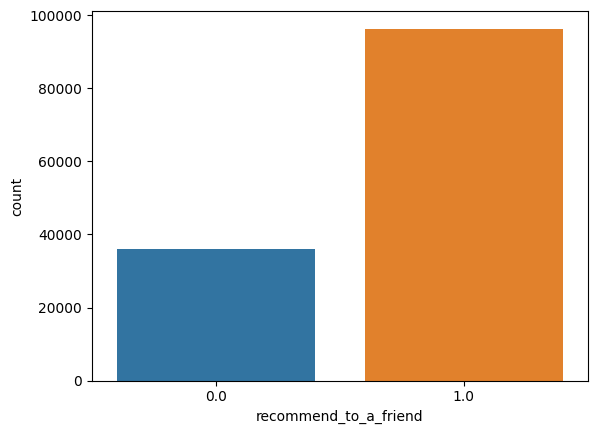

In [ ]:
sns.countplot(data, x="recommend_to_a_friend")

In [ ]:
data

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,1.0,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,1.0,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,1.0,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,1.0,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,1.0,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,NaN,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,1.0,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,NaN,Utilidades Domésticas,Material de Limpeza,Sensacional,5,1.0,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,NaN,Automotivo,Iluminação,Ótimo produto,4,1.0,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,0.0,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


<Axes: xlabel='overall_rating', ylabel='Count'>

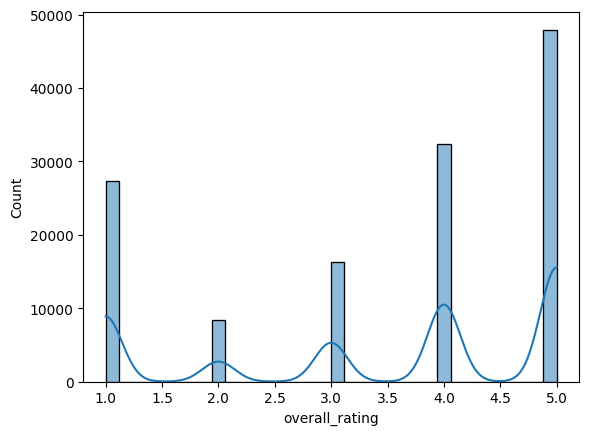

In [ ]:
sns.histplot(data['overall_rating'], kde=True)

In [ ]:
data = data[data['review_text'].notnull()]

In [ ]:
data['text_size'] = data['review_text'].apply(len)

<ipython-input-20-6e02405c49d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_size'] = data['review_text'].apply(len)


<Axes: xlabel='text_size', ylabel='Count'>

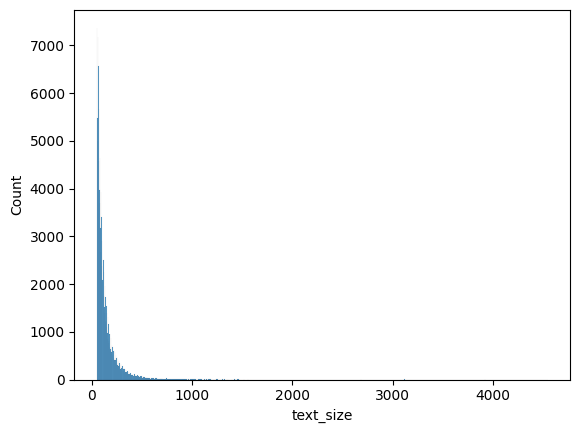

In [ ]:
sns.histplot(data['text_size'])

<Axes: xlabel='text_size', ylabel='Count'>

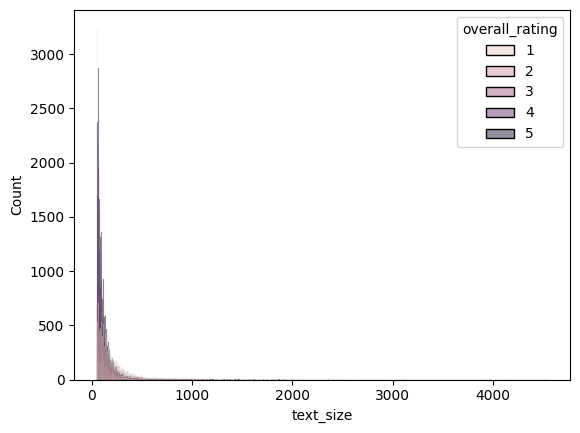

In [ ]:
sns.histplot(data=data, x='text_size', hue="overall_rating")

In [ ]:
data.corr()

<ipython-input-23-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,overall_rating,recommend_to_a_friend,reviewer_birth_year,text_size
overall_rating,1.000000,0.832048,0.002715,-0.241603
recommend_to_a_friend,0.832048,1.000000,-0.008635,-0.236423
reviewer_birth_year,0.002715,-0.008635,1.000000,0.029061
text_size,-0.241603,-0.236423,0.029061,1.000000


In [ ]:
data.groupby('overall_rating').describe()

recommend_to_a_friend                                          \
                               count      mean       std  min  25%  50%  75%   
overall_rating                                                                 
1                            25646.0  0.028932  0.167620  0.0  0.0  0.0  0.0   
2                             8126.0  0.247846  0.431789  0.0  0.0  0.0  0.0   
3                            16008.0  0.886244  0.317524  0.0  1.0  1.0  1.0   
4                            31987.0  0.984587  0.123189  0.0  1.0  1.0  1.0   
5                            47313.0  0.985543  0.119366  0.0  1.0  1.0  1.0   

                         len                                             \
                max    count        mean         std   min   25%    50%   
overall_rating                                                            
1               1.0  25646.0  191.860095  165.566801  50.0  88.0  141.0   
2               1.0   8126.0  176.232464  147.802997  50.0  84.0  129.0   
3               1.0  16010.0  138.978513  130.566274  50.0  69.0   98.0   
4               1.0  31987.0  114.558227   98.919955  50.0  64.0   84.0   
5               1.0  47329.0  114.342707   99.108283  50.0  64.0   85.0   

                               
                  75%     max  
overall_rating                 
1               236.0  3924.0  
2               214.0  2060.0  
3               159.0  4134.0  
4               126.0  2002.0  
5               126.0  4548.0

Quanto menor o texto mais baixo o tende a ser o rating
Gênero e data de nascimento parecem parece ter pouca influência nos resultados finais, vamos então descartá-las e trabalhar só com texto.
- O rating tem uma correlação muito forte com se a pessoa recomendaria ou não para um amigo, e eu acredito que se analisar mais a fundo posso descobrir um subgrupo e tornar esses dados úteis como modelos|embeddings|texto pretreinado.

Quanto maior a quantidade de estrelas maior a chance da pessoa recomendar para um amigo, porém, curiosamente a chance nunca é 100%.

RNN? -> memória

Árvore de decisão? -> interpretabilidade

Naive Bayes -> rasoavelmente interpretável + memória, mas tenho que 
garantir que seja válido para entradas não flutuantes.

O que fazer com a saída se usar RNN?
* A média dos 5 resultados?
* pegar o maior e colocar como se fosse o correto?
* a média dos n melhores?

AutoML?

In [ ]:
# colunas uteis = 'review_title', 'overall_rating', 'recommend_to_a_friend', 'review_text' 	

In [ ]:
necessary_data = data.copy()
necessary_data = necessary_data[['review_title', 'review_text', 'overall_rating', 'recommend_to_a_friend']]
necessary_data

,review_title,review_text,overall_rating,recommend_to_a_friend
0,Bom,Estou contente com a compra entrega rápida o ú...,4,1.0
1,"Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",4,1.0
2,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4,1.0
3,presente mais que desejado,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4,1.0
4,"Sem duvidas, excelente","A entrega foi no prazo, as americanas estão de...",5,1.0
...,...,...,...,...
132368,Ótimo produto!,"Vale muito, estou usando no controle do Xbox e...",5,1.0
132369,Sensacional,"Prático e barato, super indico o produto para ...",5,1.0
132370,Ótimo produto,Chegou antes do prazo previsto e corresponde a...,4,1.0
132371,O produto não é bom.,"Material fraco, poderia ser melhor. Ficou deve...",1,0.0


# Tratando o texto:

## Removendo simbolos e caracteres especiais:

In [ ]:
punc = string.punctuation

def remove_punctuation(text):
    if(type(text) == type('str')):
        return "".join([char for char in text if char not in punc])
    return text

In [ ]:
necessary_data['review_text'] = necessary_data['review_text'].apply(remove_punctuation)
necessary_data['review_title'] = necessary_data['review_title'].apply(remove_punctuation)

In [ ]:
necessary_data

,review_title,review_text,overall_rating,recommend_to_a_friend
0,Bom,Estou contente com a compra entrega rápida o ú...,4,1.0
1,Preço imbatível ótima qualidade,Por apenas R199420eu consegui comprar esse lin...,4,1.0
2,ATENDE TODAS AS EXPECTATIVA,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4,1.0
3,presente mais que desejado,MEU FILHO AMOU PARECE DE VERDADE COM TANTOS DE...,4,1.0
4,Sem duvidas excelente,A entrega foi no prazo as americanas estão de ...,5,1.0
...,...,...,...,...
132368,Ótimo produto,Vale muito estou usando no controle do Xbox e ...,5,1.0
132369,Sensacional,Prático e barato super indico o produto para q...,5,1.0
132370,Ótimo produto,Chegou antes do prazo previsto e corresponde a...,4,1.0
132371,O produto não é bom,Material fraco poderia ser melhor Ficou devend...,1,0.0


In [ ]:
necessary_data['review_text'] = necessary_data['review_text'].apply(lambda text: text.lower())
necessary_data['review_title'] = necessary_data['review_title'].apply(lambda text: text.lower() if type(text) == type('text') else text)

In [ ]:
necessary_data

,review_title,review_text,overall_rating,recommend_to_a_friend
0,bom,estou contente com a compra entrega rápida o ú...,4,1.0
1,preço imbatível ótima qualidade,por apenas r199420eu consegui comprar esse lin...,4,1.0
2,atende todas as expectativa,supera em agilidade e praticidade outras panel...,4,1.0
3,presente mais que desejado,meu filho amou parece de verdade com tantos de...,4,1.0
4,sem duvidas excelente,a entrega foi no prazo as americanas estão de ...,5,1.0
...,...,...,...,...
132368,ótimo produto,vale muito estou usando no controle do xbox e ...,5,1.0
132369,sensacional,prático e barato super indico o produto para q...,5,1.0
132370,ótimo produto,chegou antes do prazo previsto e corresponde a...,4,1.0
132371,o produto não é bom,material fraco poderia ser melhor ficou devend...,1,0.0


## Tokenizando:

In [ ]:
#E se eu criasse novas linhas usando os titulos como se fossem reviews curtar para facilitar de meu modelo aprender até mesmo reviews mais diretas?

In [ ]:
necessary_data['review_token'] = necessary_data['review_text'].apply(word_tokenize)

In [ ]:
necessary_data['review_token']

0         [estou, contente, com, a, compra, entrega, ráp...
1         [por, apenas, r199420eu, consegui, comprar, es...
2         [supera, em, agilidade, e, praticidade, outras...
3         [meu, filho, amou, parece, de, verdade, com, t...
4         [a, entrega, foi, no, prazo, as, americanas, e...
                                ...                        
132368    [vale, muito, estou, usando, no, controle, do,...
132369    [prático, e, barato, super, indico, o, produto...
132370    [chegou, antes, do, prazo, previsto, e, corres...
132371    [material, fraco, poderia, ser, melhor, ficou,...
132372    [comprei, esse, produto, quando, chegou, estav...
Name: review_token, Length: 129098, dtype: object

## Removendo stopwords:

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [ ]:
print(stopwords)
#Por mais que algumas delas parecessem útil, para modelos simples podem ser só ruído

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [ ]:
#Nesse ponto eu só desisti de trabalhar com textos
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stopwords]

necessary_data['review_token'] = necessary_data['review_token'].apply(remove_stop_words)

## Lemmatizando :D

In [ ]:
nlp = spacy.load("pt_core_news_sm", disable=['ner'])

In [ ]:
necessary_data['review_token'] = necessary_data['review_token'].apply(lambda token: ' '.join(token))

In [ ]:
tqdm.pandas(desc="Processando textos")
necessary_data['review_token'] = necessary_data['review_token'].progress_apply( lambda text: nlp(text))

Processando textos: 100%|██████████| 129098/129098 [13:23<00:00, 160.68it/s]


In [ ]:
necessary_data

,review_title,review_text,overall_rating,recommend_to_a_friend,review_token
0,bom,estou contente com a compra entrega rápida o ú...,4,1.0,"(contente, compra, entrega, rápida, único, pro..."
1,preço imbatível ótima qualidade,por apenas r199420eu consegui comprar esse lin...,4,1.0,"(apenas, r199420eu, consegui, comprar, lindo, ..."
2,atende todas as expectativa,supera em agilidade e praticidade outras panel...,4,1.0,"(supera, agilidade, praticidade, outras, panel..."
3,presente mais que desejado,meu filho amou parece de verdade com tantos de...,4,1.0,"(filho, amou, parece, verdade, tantos, detalhe..."
4,sem duvidas excelente,a entrega foi no prazo as americanas estão de ...,5,1.0,"(entrega, prazo, americanas, parabéns, smart, ..."
...,...,...,...,...,...
132368,ótimo produto,vale muito estou usando no controle do xbox e ...,5,1.0,"(vale, usando, controle, xbox, durou, semana, ..."
132369,sensacional,prático e barato super indico o produto para q...,5,1.0,"(prático, barato, super, indico, produto, corr..."
132370,ótimo produto,chegou antes do prazo previsto e corresponde a...,4,1.0,"(chegou, antes, prazo, previsto, corresponde, ..."
132371,o produto não é bom,material fraco poderia ser melhor ficou devend...,1,0.0,"(material, fraco, poderia, melhor, ficou, deve..."


In [ ]:
#Não acho que o lemmatization funcionou tão bem, mas enfim...
necessary_data.drop(['review_text', 'review_title'], axis=1)

,overall_rating,recommend_to_a_friend,review_token
0,4,1.0,"(contente, compra, entrega, rápida, único, pro..."
1,4,1.0,"(apenas, r199420eu, consegui, comprar, lindo, ..."
2,4,1.0,"(supera, agilidade, praticidade, outras, panel..."
3,4,1.0,"(filho, amou, parece, verdade, tantos, detalhe..."
4,5,1.0,"(entrega, prazo, americanas, parabéns, smart, ..."
...,...,...,...
132368,5,1.0,"(vale, usando, controle, xbox, durou, semana, ..."
132369,5,1.0,"(prático, barato, super, indico, produto, corr..."
132370,4,1.0,"(chegou, antes, prazo, previsto, corresponde, ..."
132371,1,0.0,"(material, fraco, poderia, melhor, ficou, deve..."


In [ ]:
necessary_data['review_token'] = necessary_data['review_token'].apply(lambda token: token.text)

# Pegando dados binários e de classificação (por estrelas):

In [ ]:
data_bin = necessary_data[['review_token', 'recommend_to_a_friend']]
data_rating = necessary_data[['review_token', 'overall_rating']]

In [ ]:
#Quem gostou recomenda, quem não gostou não recomenda >:)
data_bin

,review_token,recommend_to_a_friend
0,contente compra entrega rápida único problema ...,1.0
1,apenas r199420eu consegui comprar lindo copo a...,1.0
2,supera agilidade praticidade outras panelas el...,1.0
3,filho amou parece verdade tantos detalhes têm,1.0
4,entrega prazo americanas parabéns smart tv boa...,1.0
...,...,...
132368,vale usando controle xbox durou semana carga p...,1.0
132369,prático barato super indico produto corre dia ...,1.0
132370,chegou antes prazo previsto corresponde anúncio,1.0
132371,material fraco poderia melhor ficou devendo op...,0.0


# Splitting in train|test:

In [ ]:
data_bin = data_bin.dropna()

In [ ]:
X = data_bin['review_token']
y = data_bin['recommend_to_a_friend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=30000)
vector = vectorizer.fit_transform(X_train)

In [ ]:
vector.shape

(103264, 30000)

In [ ]:
X_test_ = vectorizer.transform(X_test)

# Tentando modelo de árvores:
- Particularmente não acho o modelo de árvores muito útil, mas ele pode nos ajudar a aprender algo sobre as palavras do nosso vocabulario.

In [ ]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(vector, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[23928] <= 0.013\ngini = 0.388\nsamples = 103264\nvalue = [27182, 76082]'),
 Text(0.25, 0.5, 'x[4347] <= 0.074\ngini = 0.357\nsamples = 96996\nvalue = [22551, 74445]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.391\nsamples = 81782\nvalue = [21827, 59955]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.091\nsamples = 15214\nvalue = [724, 14490]'),
 Text(0.75, 0.5, 'x[2089] <= 0.064\ngini = 0.386\nsamples = 6268\nvalue = [4631, 1637]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.347\nsamples = 5855\nvalue = [4547, 1308]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.324\nsamples = 413\nvalue = [84, 329]')]

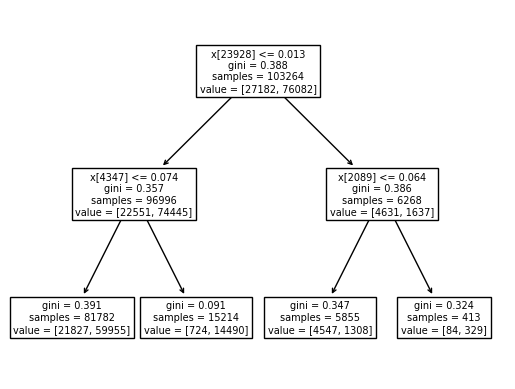

In [ ]:
plot_tree(model)

In [ ]:
#Palavras que melhor dividem os dados
#Eu deveria melhorar a max_depth para poder ver mais dessas palavr
print(vectorizer.get_feature_names_out()[23928],
      vectorizer.get_feature_names_out()[4347],
      vectorizer.get_feature_names_out()[2089])

recebi bom antes


In [ ]:
y_train_ = model.predict(vector)

Performance on training data:

---



In [ ]:
print(classification_report(y_train, y_train_))

              precision    recall  f1-score   support

         0.0       0.78      0.17      0.28     27182
         1.0       0.77      0.98      0.86     76082

    accuracy                           0.77    103264
   macro avg       0.77      0.58      0.57    103264
weighted avg       0.77      0.77      0.71    103264



In [ ]:
confusion_matrix(y_train, y_train_)

array([[ 4547, 22635],
       [ 1308, 74774]])

Performance on testing data:

In [ ]:
y_test_ = model.predict(X_test_)

In [ ]:
print(classification_report(y_test, y_test_))

              precision    recall  f1-score   support

         0.0       0.79      0.17      0.28      6832
         1.0       0.77      0.98      0.86     18984

    accuracy                           0.77     25816
   macro avg       0.78      0.58      0.57     25816
weighted avg       0.77      0.77      0.71     25816



In [ ]:
confusion_matrix(y_test, y_test_)

array([[ 1168,  5664],
       [  305, 18679]])

# Tentando Naive Bayes:
* Acredito que a memória probabilística que o NaiveBayes cria pode ser útil não apenas para entendermos o vocabulario, como para classificação de textos simples.

In [ ]:
model = MultinomialNB()
model.fit(vector, y_train)

MultinomialNB()

In [ ]:
y_train_ = model.predict(vector)

In [ ]:
print(classification_report(y_train, y_train_))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83     27182
         1.0       0.94      0.94      0.94     76082

    accuracy                           0.91    103264
   macro avg       0.88      0.88      0.88    103264
weighted avg       0.91      0.91      0.91    103264



In [ ]:
confusion_matrix(y_train, y_train_)

array([[22475,  4707],
       [ 4820, 71262]])

In [ ]:
y_test_ = model.predict(X_test_)

In [ ]:
print(classification_report(y_test, y_test_))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      6832
         1.0       0.93      0.93      0.93     18984

    accuracy                           0.90     25816
   macro avg       0.87      0.87      0.87     25816
weighted avg       0.90      0.90      0.90     25816



In [ ]:
confusion_matrix(y_test, y_test_)

array([[ 5486,  1346],
       [ 1280, 17704]])

# Conclusões:
Mesmo um Naive Bayes simples teve um desepenho rasoável para o problema das reviews

Ainda tenho que testar a hipótese de se um modelo criado com esse dataset pode ser usado/retreinado para outros modelos de review em lingua portuguesa.

O caso negativo ficou com precisão e recall (por consequência também F1) baixos.

\\
**Hipóteses quanto ao que pode ter piorado os negativos:**
- Talvez se eu tivesse tratado alguns padrões textuais como números e valores monetários antes de fazer o TF-IDF eu tivesse facilitado o processo de aprendizado de meu modelo
- Será que foi alguma remoção de stopwords?
- Aceitar mais palavras como parâmetros possivelmente
- Aumentar a quantidade de NGrams pode me ajudar a entender sentenças mais longas (incluindo sentenças negativas) - por exemplo, talvez com ngram maximo 3 ele entenda a frase "não gostei do produto" como simplesmente "gostei do produto"
- Modelo de Machine learning fraco (apesar de não ter problemas de over ou underfitting) acredito que usar LSTM

\\
**Próximos passos:**
- Criar um pipeline para tratamento de texto (porque eu não aguento mais fazer as mesmas coisas sempre)
- Testar as hipóteses acima
- Testar uma RNN simples
- Tentar dar uma tunada nela
- Fazer o teste com word2vec (talvez o espaçamento vetorial das palavras em multiplas dimensões ajude)
  - Tentar um modelo de palavras pretreinadas do spacy
- Testar um Bert


**Feedback:**
- Usar embeddings (com umas 50 dimensões)
